<a href="https://colab.research.google.com/github/azadkader/Final-Project/blob/main/Final_Project_Final_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL-Tutorials/blob/master/2-Advance/FinRL_Ensemble_StockTrading_ICAIF_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Stock Trading Using Ensemble Strategy



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for single stock trading. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A includes three actions: a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying one stock. Also, an action can be carried upon multiple shares. We use
an action space {−k, ..., −1, 0, 1, ..., k}, where k denotes the number of shares. For example, "Buy
10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [2]:
pip install -U ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.4 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.14.0 which is incompatible.


In [3]:
# ## install finrl library
!pip install wrds
!pip install swig
!pip install -q condacolab
import condacolab
condacolab.install()
!apt-get update -y -qq && apt-get install -y -qq cmake libopenmpi-dev python3-dev zlib1g-dev libgl1-mesa-glx swig
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.19
    Uninstalling SQLAlchemy-2.0.19:
      Successfully uninstalled SQLAlchemy-2.0.19
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.9 MB/s eta 0:00:00
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...
Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 120511 files and directories currently installed.)
Preparing to unpack .../libgl1-mesa-glx_23.0.4-0ubuntu1~22.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (23.0.4-0ubuntu1~22.04.1) ...
Selecting previously unselected package swig4.0.
Preparing to unpack .../swig4.0_4.0


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

In [4]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install stockstats
!pip install gym
!pip install stable-baselines3
!pip install tensorflow
!pip install pyfolio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typ

<a id='1.3'></a>
## 2.3. Import Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

<a id='1.4'></a>
## 2.4. Create Folders

In [3]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).




-----
class YahooDownloader:
    Provides methods for retrieving daily stock data from
    Yahoo Finance API

    Attributes
    ----------
        start_date : str
            start date of the data (modified from config.py)
        end_date : str
            end date of the data (modified from config.py)
        ticker_list : list
            a list of stock tickers (modified from config.py)

    Methods
    -------
    fetch_data()
        Fetches data from yahoo API


In [4]:
print(DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [5]:
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'

TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2021-10-01'
TEST_START_DATE = '2021-10-01'
TEST_END_DATE = '2023-08-10'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.496294,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.488056,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.437019,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777542,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,40.732994,7325600,CAT,0


In [7]:
df.tail()

,date,open,high,low,close,volume,tic,day
100368,2023-08-09,504.000000,505.730011,500.880005,502.109985,1916900,UNH,2
100369,2023-08-09,240.500000,241.970001,239.490005,239.309998,4055000,V,2
100370,2023-08-09,32.509998,32.830002,32.340000,32.709999,20798500,VZ,2
100371,2023-08-09,29.469999,29.850000,29.230000,29.260000,6459900,WBA,2
100372,2023-08-09,160.910004,162.100006,160.710007,160.339996,4403200,WMT,2


In [8]:
df.shape

(100373, 8)

In [9]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.496294,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.488056,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.437019,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777542,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,40.732994,7325600,CAT,0


In [10]:
len(df.tic.unique())

30

In [11]:
df.tic.value_counts()

tic
AAPL    3423
AMGN    3423
WMT     3423
WBA     3423
VZ      3423
V       3423
UNH     3423
TRV     3423
PG      3423
NKE     3423
MSFT    3423
MRK     3423
MMM     3423
MCD     3423
KO      3423
JPM     3423
JNJ     3423
INTC    3423
IBM     3423
HON     3423
HD      3423
GS      3423
DIS     3423
CVX     3423
CSCO    3423
CRM     3423
CAT     3423
BA      3423
AXP     3423
DOW     1106
Name: count, dtype: int64

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [12]:
INDICATORS = ['macd',
                'rsi_30',
                'cci_30',
                'dx_30']

In [13]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [14]:
processed.sample(5)

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,dx_30,turbulence
31626,2014-05-05,40.650002,40.930000,40.549999,30.386848,10163500,KO,0,0.439123,61.137324,77.890004,23.992249,23.316279
31059,2014-04-07,18.857857,18.960714,18.638929,16.532183,289850400,AAPL,0,0.026925,46.691586,-93.259957,15.188077,39.740078
7539,2011-01-12,54.520000,55.320000,54.340000,41.255024,13553300,WMT,2,0.063541,55.642038,121.779198,29.864215,21.529114
52241,2017-03-01,172.543015,174.521988,172.112808,127.956833,3143858,IBM,2,1.853419,65.855584,92.707083,35.502084,32.021512
67382,2019-03-28,100.000000,100.800003,99.739998,87.884140,12454100,JPM,3,-0.829758,45.001256,-140.815437,27.147356,15.645428


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.

The action space describes the allowed actions that the agent interacts with the environment. Normally, action a includes three actions: {-1, 0, 1}, where -1, 0, 1 represent selling, holding, and buying one share. Also, an action can be carried upon multiple shares. We use an action space {-k,…,-1, 0, 1, …, k}, where k denotes the number of shares to buy and -k denotes the number of shares to sell. For example, "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or -10, respectively. The continuous action space needs to be normalized to [-1, 1], since the policy is defined on a Gaussian distribution, which needs to be normalized and symmetric.

In [15]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 175


In [16]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.001,
    "sell_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4,
    "print_verbosity":5

}

<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

* In this notebook, we are training and validating 3 agents (A2C, PPO, DDPG) using Rolling-window Ensemble Method ([reference code](https://github.com/AI4Finance-LLC/Deep-Reinforcement-Learning-for-Automated-Stock-Trading-Ensemble-Strategy-ICAIF-2020/blob/80415db8fa7b2179df6bd7e81ce4fe8dbf913806/model/models.py#L92))

In [17]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window,
                 validation_window=validation_window,
                 **env_kwargs)



In [18]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000,
                 'ppo' : 10_000,
                 'ddpg' : 10_000
                 }

In [19]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  201.71740145107452
======Model training from:  2010-01-01 to  2021-10-04
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cuda device
Logging to tensorboard_log/a2c/a2c_126_1
---------------------------------------
| time/                 |             |
|    fps                | 89          |
|    iterations         | 100         |
|    time_elapsed       | 5           |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -41.2       |
|    explained_variance | -0.628      |
|    learning_rate      | 0.0007      |
|    n_updates          | 99          |
|    policy_loss        | 11.1        |
|    reward             | -0.33364853 |
|    std                | 1           |
|    value_loss         | 1.29        |
---------------------------------------
---------------------------------------
| time/                 |      

In [20]:
# Assuming df_summary contains trained models (you'll need to adjust based on the actual structure)
trained_models = df_summary.get('trained_models', {})

# 2. Save each model
for model_name, model in trained_models.items():
    model_path = f"{model_name}_model.zip"
    model.save(model_path)

# 3. Download the saved models (if you're on Google Colab and want to download to your machine)
from google.colab import files

for model_name in trained_models.keys():
    files.download(f"{model_name}_model.zip")

In [21]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,126,2021-10-04,2022-01-03,A2C,0.280611,0.104967,0.241499
1,189,2022-01-03,2022-04-04,A2C,-0.104286,-0.234024,-0.110134
2,252,2022-04-04,2022-07-06,DDPG,-0.244175,-0.278159,-0.21466
3,315,2022-07-06,2022-10-04,DDPG,-0.323993,-0.15403,-0.102942
4,378,2022-10-04,2023-01-04,A2C,0.319109,0.199774,0.263775
5,441,2023-01-04,2023-04-05,A2C,0.090503,0.031974,0.016135


<a id='6'></a>
# Part 7: Backtest My Strategy


In [29]:
!pip install pandas==1.2.5

  Using cached pandas-1.2.5.tar.gz (5.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas: filename=pandas-1.2.5-cp310-cp310-linux_x86_64.whl size=10046187 sha256=987b159023d8d607827edc65c3ccf1bf0ce3b71c30c8cdab0d3bfa6d70c9f353
  Stored in directory: /root/.cache/pip/wheels/80/c4/45/fbb3bb8c610988624e1a0cb4c55ac7409fba8c9b3fbaadcd9e
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.27 requires pandas>=1.3.0, but you have pandas 1.2.5 which is incompatible.


In [31]:
!pip install quantstats


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.9 MB/s eta 0:00:00
  Using cached pandas-2.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.5
    Uninstalling pandas-1.2.5:
      Successfully uninstalled pandas-1.2.5


In [35]:

import copy

# Assuming your processed data and other initializations
unique_trade_date = processed[(processed['date'] > TEST_START_DATE) & (processed['date'] <= TEST_END_DATE)]['date'].unique()
df_trade_date = pd.DataFrame({'datadate': unique_trade_date})

df_account_value = pd.DataFrame()
for i in range(rebalance_window + validation_window, len(unique_trade_date) + 1, rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble', i))
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)

# Compute Sharpe ratio
sharpe = (252**0.5) * df_account_value.account_value.pct_change(1).mean() / df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ', sharpe)

df_account_value = df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

# Baseline stats
df_dji_ = get_baseline(ticker="^DJI", start=df_account_value.loc[0, 'date'], end=df_account_value.loc[len(df_account_value) - 1, 'date'])
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
df_dji = df_dji.set_index(df_dji.columns[0])

df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

# Create deep copies of original dataframes to ensure they remain intact
df_account_value_original = copy.deepcopy(df_account_value)
df_dji_original = copy.deepcopy(df_dji)
df_result_ensemble_original = copy.deepcopy(df_result_ensemble)

result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
result.columns = ['ensemble', 'dji']

# Convert account values to daily returns for strategy and benchmark
ensemble_returns = result['ensemble'].pct_change().dropna()
dji_returns = result['dji'].pct_change().dropna()

# Ensure the two return series have the same date indices
common_dates = ensemble_returns.index.intersection(dji_returns.index)
ensemble_returns = ensemble_returns.loc[common_dates]
dji_returns = dji_returns.loc[common_dates]

ensemble_returns.index = pd.to_datetime(ensemble_returns.index)
dji_returns.index = pd.to_datetime(dji_returns.index)


Sharpe Ratio:  -0.27715725389310303
[*********************100%***********************]  1 of 1 completed


AttributeError: ignored

In [36]:
!find /usr/local/lib/python3.10/site-packages/ -name yahoodownloader.py


/usr/local/lib/python3.10/site-packages/finrl/meta/preprocessor/yahoodownloader.py


In [ ]:
!sed -i 's/data_df.date.apply(lambda x: x.strftime("%Y-%m-%d"))/data_df["date"].apply(lambda x: x.strftime("%Y-%m-%d"))/g' /usr/local/lib/python3.10/site-packages/finrl/meta/preprocessor/yahoodownloader.py

In [34]:
print(processed.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'tic', 'day', 'macd',
       'rsi_30', 'cci_30', 'dx_30', 'turbulence'],
      dtype='object')


In [ ]:
import quantstats as qs

# Extend pandas functionality with metrics, etc.
qs.extend_pandas()

# Analyze the strategy returns
qs.reports.full(ensemble_returns, benchmark=dji_returns)


[Performance Metrics]



findfont: Font family 'Arial' not found.


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2022-01-04   2022-01-04
End Period                 2023-07-06   2023-07-06
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          -6.28%       -10.78%
CAGR﹪                     -2.94%       -5.11%

Sharpe                     -0.16        -0.28
Prob. Sharpe Ratio         42.46%       36.74%
Smart Sharpe               -0.15        -0.27
Sortino                    -0.22        -0.38
Smart Sortino              -0.22        -0.38
Sortino/√2                 -0.15        -0.27
Smart Sortino/√2           -0.15        -0.27
Omega                      0.95         0.95

Max Drawdown               -21.94%      -26.03%
Longest DD Days            548          548
Volatility (ann.)          17.74%       20.17%
R^2                        0.82         0.82
Information Ratio          -0.02        -0.02
Calmar     

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

In [38]:
!pip install pandas --upgrade


In [39]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

TypeError: ignored

In [40]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.27715725389310303


In [41]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,1.000000e+06,2022-01-03,NaN,2022-01-03
1,1.001777e+06,2022-01-04,0.001777,2022-01-04
2,1.000164e+06,2022-01-05,-0.001610,2022-01-05
3,9.993474e+05,2022-01-06,-0.000816,2022-01-06
4,9.971338e+05,2022-01-07,-0.002215,2022-01-07


<Axes: >

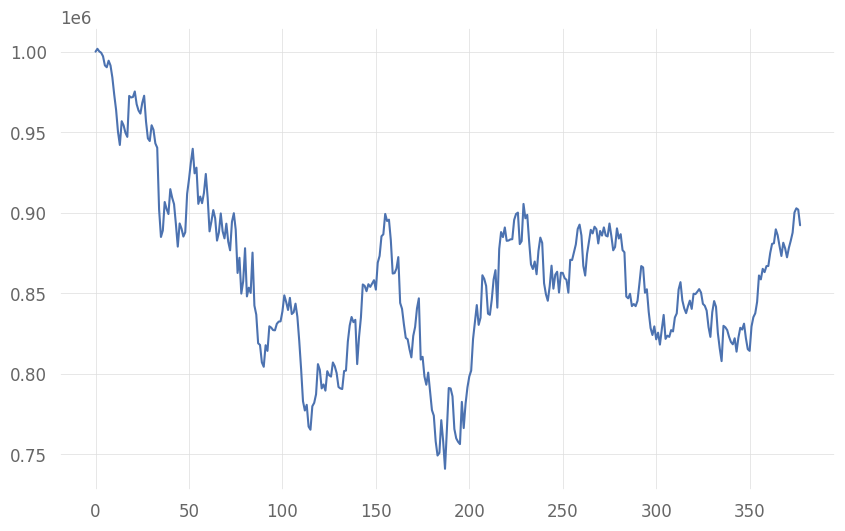

In [42]:
%matplotlib inline
df_account_value.account_value.plot()

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [43]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.073211
Cumulative returns    -0.107781
Annual volatility      0.201707
Sharpe ratio          -0.277157
Calmar ratio          -0.281234
Stability              0.113810
Max drawdown          -0.260321
Omega ratio            0.954768
Sortino ratio         -0.384355
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.938293
Daily value at risk   -0.025635
dtype: float64


In [44]:
#baseline stats
print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(df_dji_, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed


AttributeError: ignored

In [45]:
df_dji = pd.DataFrame()
df_dji['date'] = df_account_value['date']
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * env_kwargs["initial_amount"]
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji.csv")
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)
df_dji.to_csv("df_dji+.csv")

df_account_value.to_csv('df_account_value.csv')


df_dji:             date           dji
0    2022-01-03  1.000000e+06
1    2022-01-04  1.005866e+06
2    2022-01-05  9.951360e+05
3    2022-01-06  9.904718e+05
4    2022-01-07  9.903404e+05
..          ...           ...
373  2023-06-29  9.326874e+05
374  2023-06-30  9.404823e+05
375  2023-07-03  9.407794e+05
376  2023-07-05  9.372307e+05
377  2023-07-06           NaN

[378 rows x 2 columns]
df_dji:                       dji
date                    
2022-01-03  1.000000e+06
2022-01-04  1.005866e+06
2022-01-05  9.951360e+05
2022-01-06  9.904718e+05
2022-01-07  9.903404e+05
...                  ...
2023-06-29  9.326874e+05
2023-06-30  9.404823e+05
2023-07-03  9.407794e+05
2023-07-05  9.372307e+05
2023-07-06           NaN

[378 rows x 1 columns]


<a id='6.2'></a>
## 7.2 BackTestPlot

df_result_ensemble.columns:  Index(['ensemble'], dtype='object')
df_trade_date:         datadate
0    2021-10-04
1    2021-10-05
2    2021-10-06
3    2021-10-07
4    2021-10-08
..          ...
460  2023-08-03
461  2023-08-04
462  2023-08-07
463  2023-08-08
464  2023-08-09

[465 rows x 1 columns]
df_result_ensemble:                  ensemble
date                    
2022-01-03  1.000000e+06
2022-01-04  1.001777e+06
2022-01-05  1.000164e+06
2022-01-06  9.993474e+05
2022-01-07  9.971338e+05
...                  ...
2023-06-29  8.876421e+05
2023-06-30  9.001688e+05
2023-07-03  9.027491e+05
2023-07-05  9.019069e+05
2023-07-06  8.922188e+05

[378 rows x 1 columns]
==============Compare to DJIA===========
result:                  ensemble           dji
date                                  
2022-01-03  1.000000e+06  1.000000e+06
2022-01-04  1.001777e+06  1.005866e+06
2022-01-05  1.000164e+06  9.951360e+05
2022-01-06  9.993474e+05  9.904718e+05
2022-01-07  9.971338e+05  9.903404e+05
...       

<Figure size 1500x500 with 0 Axes>

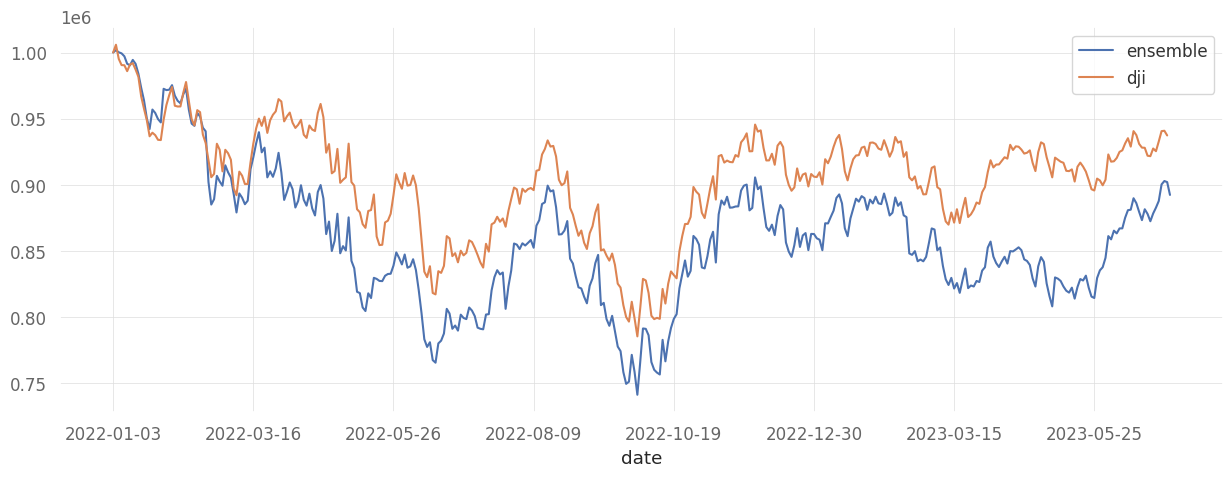

In [46]:


# print("==============Compare to DJIA===========")
# %matplotlib inline
# # S&P 500: ^GSPC
# # Dow Jones Index: ^DJI
# # NASDAQ 100: ^NDX
# backtest_plot(df_account_value,
#               baseline_ticker = '^DJI',
#               baseline_start = df_account_value.loc[0,'date'],
#               baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])
df.to_csv("df.csv")
df_result_ensemble = pd.DataFrame({'date': df_account_value['date'], 'ensemble': df_account_value['account_value']})
df_result_ensemble = df_result_ensemble.set_index('date')

print("df_result_ensemble.columns: ", df_result_ensemble.columns)

# df_result_ensemble.drop(df_result_ensemble.columns[0], axis = 1)
print("df_trade_date: ", df_trade_date)
# df_result_ensemble['date'] = df_trade_date['datadate']
# df_result_ensemble['account_value'] = df_account_value['account_value']
df_result_ensemble.to_csv("df_result_ensemble.csv")
print("df_result_ensemble: ", df_result_ensemble)
print("==============Compare to DJIA===========")
result = pd.DataFrame()
# result = pd.merge(result, df_result_ensemble, left_index=True, right_index=True)
# result = pd.merge(result, df_dji, left_index=True, right_index=True)
result = pd.merge(df_result_ensemble, df_dji, left_index=True, right_index=True)
print("result: ", result)
result.to_csv("result.csv")
result.columns = ['ensemble', 'dji']

%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [ ]:
%pip freeze

absl-py==1.4.0
aiodns==3.0.0
aiohttp==3.8.2
aiohttp-cors==0.7.0
aiosignal==1.3.1
ale-py==0.8.1
alpaca-trade-api==3.0.2
appdirs==1.4.4
asttokens==2.2.1
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
AutoROM==0.6.1
AutoROM.accept-rom-license==0.6.1
backcall==0.2.0
beautifulsoup4==4.12.2
blessed==1.20.0
box2d-py==2.3.5
brotlipy @ file:///home/conda/feedstock_root/build_artifacts/brotlipy_1666764671472/work
cachetools==5.3.1
ccxt==3.1.60
certifi==2022.12.7
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1671179353105/work
charset-normalizer==2.1.1
click==8.1.6
cloudpickle==2.2.1
cmake==3.27.1
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1666700638685/work
colorful==0.5.5
conda==23.1.0
conda-package-handling @ file:///home/conda/feedstock_root/build_artifacts/conda-package-handling_1669907009957/work
conda_package_streaming @ file:///home/conda/feedstock_root/build_artifacts/conda-package-streaming_1669733752472/work
condacolab==0.1.7
contourpy==